# Lesson 6 Assignment - Advertising Sales Regression

## Author - Kenji Oman

### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market.
 2. 'radio': advertising dollars spent radio ads.
 3. 'newspaper': advertising dollars spent on newspaper ads.

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

/home/koman/miniconda3/envs/dsc/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
display(ad_data.head())
display(ad_data.shape)
ad_data.describe()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


(200, 4)

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Looking at the above smmary statistics, it looks like we have 200 measurements of money spent on advertising, and the corresponding amount of sales that we had.  There are no missing data points (yay!).  Now, let's look at how each of the advertising mediums separately contribute to sales.

# Simple Linear Regression
## TV vs Sales

Intercept    7.032594
TV           0.047537
dtype: float64

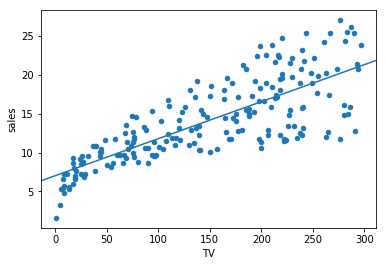

In [3]:
# Make and fit a model to the data
model = sm.OLS.from_formula('sales ~ TV', ad_data)
results = model.fit()
display(results.params)

# Now, let's plot the data and the best fit line
ax = ad_data.plot.scatter('TV', 'sales')
sm.graphics.abline_plot(model_results=results, ax=ax)
plt.show()

We see for TV vs Sales, the data is fairly linear with an intercept of 7.03 sales (this is a baseline figure of, given the current level of product use, what sales would be like without any TV advertising), and a slope of 0.0475 (how much additional sales we would get if for each unit of TV advertising we spend).  Overall, it looks like TV advertising does indeed help sales (a positive slope), although from the plot, we can see there is a fairly wide degree of variability in the data.

Now, let's take a look at how radio advertising affects sales

## Radio vs Sales

Intercept    9.311638
radio        0.202496
dtype: float64

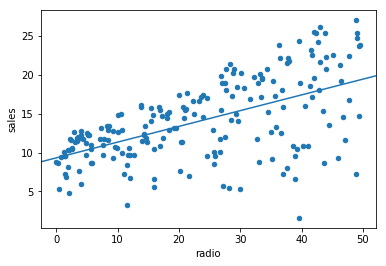

In [4]:
# Make and fit a model to the data
model = sm.OLS.from_formula('sales ~ radio', ad_data)
results = model.fit()
display(results.params)

# Now, let's plot the data and the best fit line
ax = ad_data.plot.scatter('radio', 'sales')
sm.graphics.abline_plot(model_results=results, ax=ax)
plt.show()

Here again, we were able to fit a linear model through the data, although we see a greater amount of variability in the data than we saw for TV (the y-scales are equal in both sets of plots, but the data points are spread out wider around the line for Radio vs Sales).  Despite this variability, we see a baseline sales rate (the intercept) of 9.31, and a per unit increase (the slope) of 0.202.  Since the TV and Radio spending is happening at the same time, we can't _truly_ know what the baseline sales would be (since, even though we may not be spending any money on Radio advertising, we may be advertising with TV or newspapers, etc), so let's not read too much into the exact values of the intercept, but it is good to know that as we spend more money in radio advertising, sales do increase as a whole (the slope is positive).  Now, let's look at how newspaper advertising affects sales

## Newspaper vs Sales

Intercept    12.351407
newspaper     0.054693
dtype: float64

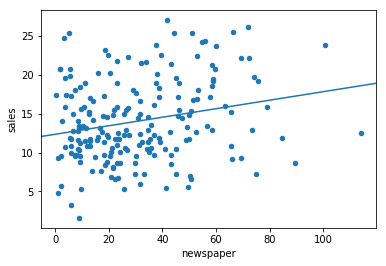

In [5]:
# Make and fit a model to the data
model = sm.OLS.from_formula('sales ~ newspaper', ad_data)
results = model.fit()
display(results.params)

# Now, let's plot the data and the best fit line
ax = ad_data.plot.scatter('newspaper', 'sales')
sm.graphics.abline_plot(model_results=results, ax=ax)
plt.show()

Wow, an even greater spread of the data!  Here, we see that, although we did fit a line through the data, there really isn't a strong correlation of newspaper advertising with sales.  Despite that, we do see a slightly positive trend, with a per unit increase in sales of 0.0547 per unit spent on newspaper advertising.

Now, let's do a multivariable regresssion (using all three predictors together), to see the overall effect.

# Multivariable Linear Regression

In [6]:
# Make and fit a model to the data
model = sm.OLS.from_formula('sales ~ TV + radio + newspaper', ad_data)
results = model.fit()

# Show the summary statistics
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 16 May 2018   Prob (F-statistic):           1.58e-96
Time:                        22:58:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Discussion of Intercept/ Slope
Now, we have fit the full model (predicting sales price given the amount spent on TV, radio, and newspapers simultaneously).  With this, we see that we have a predicted sales amount of 2.94 units even without any spending in any of our advertising domains.  We then see an increase in sales by 0.046 and 0.189 for each unit of spending in TV and radio respectively.  Interestingly, sales seem to go down with increased spending in newspaper advertising, but the effect is not signifcant (so, this basically means spending money with newspaper advertising doesn't affect sales).

## Discussion of adjusted R^2
We also see with this multi-variable fit that we have an adjusted $R^2$ of 0.896, which indicates a fairly strong relationship between advertising spending and sales (to put it another way, our model explains 89.6% of the variability seen in sales, despite only using advertising costs in TV, radio, and newspapers).

## Calculate the Mean Squared Error
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{\left(Y_i - \hat{Y_i}\right)^2}
$$

In [7]:
# The MSE
MSE = np.sum(np.square(results.resid))/ ad_data.shape[0]
MSE

2.784126314510936

We see that, on average, sales figures have a variance of 2.78 around the predicted values.

# Summary
Here we have used linear regression to predict the sales of a product based off of the advertising spending in TV, radio, and newspapers.  We found that TV and radio spending positively affects sales, while newspaper spending does not.  Our model, depsite only having these three features, explained 89.6% of the variability in sales figures, and so shows the power that linear regression has as a method for predicting this data.

## Caveats
Although I didn't mention it above, we notice that **sales is heteroscedastic with respect to TV and radio spending**, with potentially a non-linear relationship even existing between TV spending and sales.  Ideally, corrections for these effects should be taken.

Also, we failed to investigate the correlation between the different features with each other, but we presume that these will be correlated (there is likely a finite budget, so if spending in one advertising medium goes up, spending in the other media will likely go down -- also alternatively, more money over-all may be spent in advertising, if there was an influx in the advertising budget, or vice a versa, decreased overall if the marketing department underwent some budget cuts).  These kinds of patterns could be investigated in future work.